In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados = pd.read_csv("C:\\Users\\caisilva\\Desktop\\programas\\codigos\\kmeans_data.csv")

dados

,x,y
0,0.218458,0.817616
1,0.223318,0.845800
2,0.193898,0.828846
3,0.173296,0.839100
4,0.214236,0.839793
...,...,...
595,0.218651,0.134955
596,0.226598,0.132962
597,0.199883,0.120177
598,0.203428,0.126249


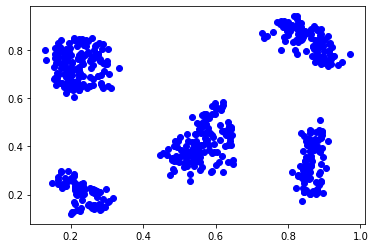

In [29]:
plt.scatter(dados['x'], dados['y'], c='b')
plt.show()

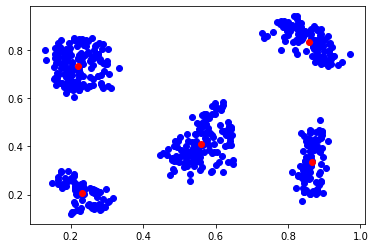

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(dados)
centros = kmeans.cluster_centers_
plt.scatter(dados['x'], dados['y'], c='b')
plt.scatter(centros[:,0], centros[:,1], c='r')
plt.show()

In [82]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [94]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(dados)

In [104]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [105]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#print("Estimated number of clusters: %d" % n_clusters_)
#print("Estimated number of noise points: %d" % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print(
#    "Adjusted Mutual Information: %0.3f"
#    % metrics.adjusted_mutual_info_score(labels_true, labels)
#)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

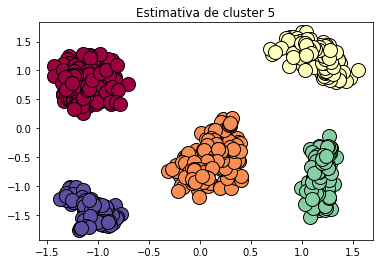

In [106]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimativa de cluster %d" % n_clusters_)
plt.show()